# TensorFlow 2.x - Multiclass Classification


## Dataset

IRIS dataset is used in this kernel to demonstrate the multiclass classification using `TensorFlow 2.x`. This dataset has 5 features, out of which 4 features are numeric features and 1 is a categorical feature. 

## 1. Import dependent libraries

In [3]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [4]:
# Data file path
FILE_PATH = '/kaggle/input/iris-flower-dataset/IRIS.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [74]:
iris_data.info()
print("=="*40)
iris_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Preparing dataset

In [6]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [7]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Dataset will be prepared by the tensorflow `from_tensor_slice()` method.

In [65]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [66]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [67]:
from tensorflow.keras import activations
from tensorflow.keras.layers import LeakyReLU,PReLU

In [75]:
def get_model(activations):
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(258, activation=activations),
        keras.layers.Dense(512, activation=activations,),
        keras.layers.Dense(100, activation=activations),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    return model
    

In [76]:
model = get_model(activations = 'relu')

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=50,batch_size = 32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 34ms/step - loss: 0.9872 - accuracy: 0.4762 - val_loss: 0.7859 - val_accuracy: 0.7333
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.7743 - accuracy: 0.6762 - val_loss: 0.5726 - val_accuracy: 0.8444
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.5724 - accuracy: 0.8476 - val_loss: 0.4436 - val_accuracy: 0.8444
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.4654 - accuracy: 0.7810 - val_loss: 0.3687 - val_accuracy: 0.8444
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3709 - accuracy: 0.9143 - val_loss: 0.3382 - val_accuracy: 0.8667
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3288 - accuracy: 0.9143 - val_loss: 0.2825 - val_accuracy: 0.9556
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.2634 - accuracy: 0.9524 - val_loss: 0.2520 - val_accuracy: 0.9778
Epoch 8/50
4/4 [===========

In [79]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9556


[0.19753175973892212, 0.9555555582046509]

## Performance Monitor

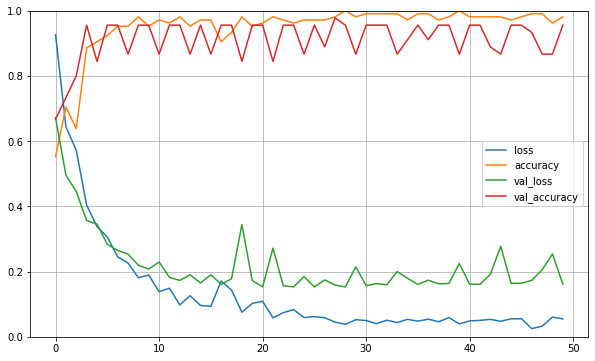

In [72]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

Actual data : [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
1
0
0


In [82]:
model.get_weights()

[array([[ 0.11284514,  0.07870766, -0.0099653 , ..., -0.08215804,
         -0.11489013,  0.01697504],
        [ 0.00548882,  0.14123921, -0.08965416, ..., -0.01330481,
          0.04729675, -0.00081179],
        [-0.00897283,  0.04324056,  0.15065026, ..., -0.06098073,
         -0.14870052, -0.00893576],
        [ 0.1652274 ,  0.01259381, -0.00948655, ...,  0.11063598,
         -0.12457469,  0.1726688 ]], dtype=float32),
 array([-0.02750536,  0.02469867, -0.00222002,  0.02208829, -0.00946444,
         0.        ,  0.        ,  0.        ,  0.01261147,  0.05409125,
         0.00362245,  0.03122742,  0.        , -0.021142  , -0.02873326,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01192572,  0.02514393, -0.01000033, -0.02315432,  0.        ,
         0.        , -0.00528696,  0.00441004,  0.        ,  0.        ,
         0.        ,  0.        , -0.02668333, -0.02940907, -0.0107641 ,
        -0.02379317,  0.        ,  0.03680022,  0.        ,  0.0